# Clustering
<a target="_blank" href="https://colab.research.google.com/github/LuWidme/uk259/blob/8ce0e9b71dc7667296419d8ab35fc6dc930b78e8/demos/UnsupervisedML.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

The aim of clustering is to automatically find groups of similar datapoints in unlabeled data. In this exercise your aim will be to implement the k-Means algorithm and apply it to a set of random data.

[[ -6.5397811    5.91717007]
 [-12.27340048  -6.98869933]
 [  9.0194847    0.35657311]
 [ -3.29341393   6.08725623]
 [ -4.47719935  -7.69626034]
 [ -5.21895556  -8.59227725]
 [ -3.71815868   7.13140312]
 [ -6.33871354  -6.98058581]
 [  2.50463798   1.68841071]
 [ -8.12926435  -6.82792749]]
[3 2 1 0 2 2 3 2 1 2]


[]

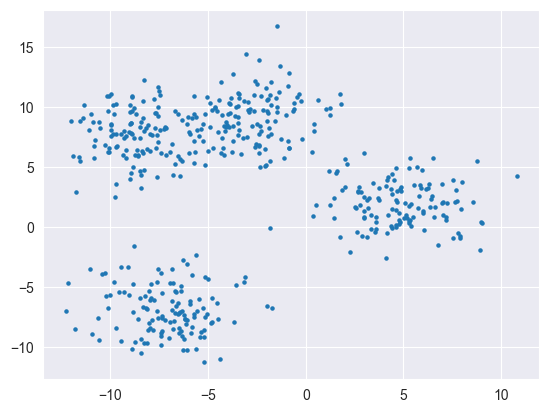

In [334]:
import numpy as np
import seaborn as sns  #for plotting
from sklearn.datasets import make_blobs  #data generator

# automatically generate a random dataset with underlying clusters. You can play around with the parameters of this generator function to test your algorithm.
# true labels are the actual group a point belongs to. you can use them later to check the quality of your algorithm

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs

# automatically generate random dataset


features, true_labels = make_blobs(
    n_samples=500,
    centers=4,
    cluster_std=0.5,
    random_state=42
)

print(features[:10])
print(true_labels[:10])
fig, ax = plt.subplots()
ax.scatter(x=features[:, 0], y=features[:, 1], s=5)
#,c=true_labels)
plt.plot()
# visualize the data with the true labels to get an overview of the data


In [352]:
from sklearn.cluster import KMeans


# implement the kmeans algorithm
# it should take a 2D array of features and number of Groups as Input
# and return a 1D array of estimated group membership of each point, and the coordinates of the cluster centers.


def k_means(featureArray, nGroups, max_iter, tol=1e-4):
    np.random.seed(42)
    #  initialize clusterCenters by sampling from the data
    clusterCenters = featureArray[np.random.choice(len(featureArray), nGroups, replace=False)]

    clusterAssignments = np.empty(len(featureArray), dtype=int)


    for iteration in range(max_iter):
        for i, point in enumerate(featureArray):
            distances = np.linalg.norm(point - clusterCenters, axis=1)
            clusterAssignments[i] = np.argmin(distances)

        max_shift = 0.0
        for k in range(nGroups):
            members = featureArray[clusterAssignments == k]
            if len(members) > 0:
                new_center = members.mean(axis=0)
                shift = np.linalg.norm(new_center - clusterCenters[k])
                max_shift = max(max_shift, shift)
                clusterCenters[k] = new_center
        if max_shift < tol:
            print(f"iterations needed: {iteration+1}")
            break
    else:
        print(f"Reached max_iter={max_iter}")

    return clusterAssignments, clusterCenters

iterations needed: 7


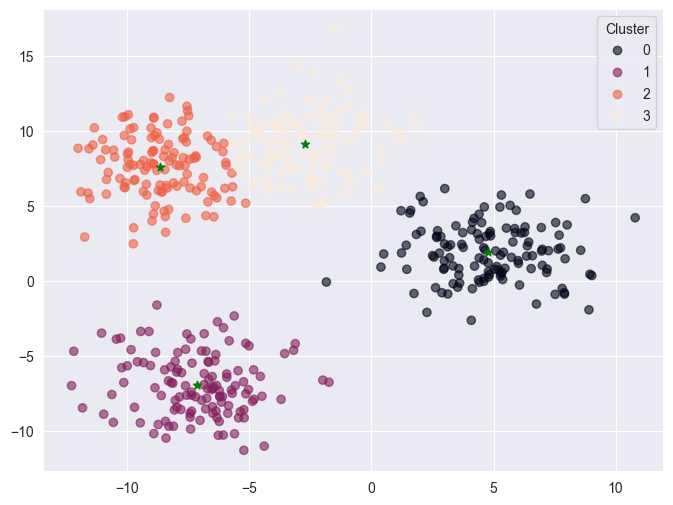

In [353]:
import matplotlib.pyplot as plt

estimated_labels, cluster_centers = k_means(features, nGroups=4, max_iter=100)

plt.figure(figsize=(8, 6))
plt.scatter(
    features[:, 0],
    features[:, 1],
    c=estimated_labels,
    alpha=0.6
)

plt.scatter(
    cluster_centers[:, 0],
    cluster_centers[:, 1],
    marker='*',
    c='green',
)

ax.scatter(x=features[:, 0], y=features[:, 1], s=5)
plt.legend(*plt.gca().collections[0].legend_elements(), title="Cluster")
plt.show()


## Principal Component Analysis
Principal Component Analysis (PCA) attempts to identify the principal components (called "eigenvectors") that best describe the variance in the data using these PCs, we can visualize points in a lower dimension (*d*) by only using a combination of the first *d* PCs.

Try to use PCA on the dataset below to summarize multiple axies into a 2D plot. Can you find out hom much variance of the data you can represent with only 2 Principal Components?

In [ ]:
from sklearn import datasets
from sklearn.decomposition import PCA

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names
